170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/10
1563/1563 [==============================] - 98s 61ms/step - loss: 1.5227 - accuracy: 0.4438 - val_loss: 1.2517 - val_accuracy: 0.5474
Epoch 2/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.1494 - accuracy: 0.5920 - val_loss: 1.0785 - val_accuracy: 0.6165
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9962 - accuracy: 0.6501 - val_loss: 0.9783 - val_accuracy: 0.6571
Epoch 4/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.8929 - accuracy: 0.6878 - val_loss: 0.9665 - val_accuracy: 0.6638
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8266 - accuracy: 0.7109 - val_loss: 0.9055 - val_accuracy: 0.6872
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7654 - accuracy: 0.7320 - val_loss: 0.8931 - val_accuracy: 0.6922
Epoch 7/10
1563/1563 [==============================] - 8

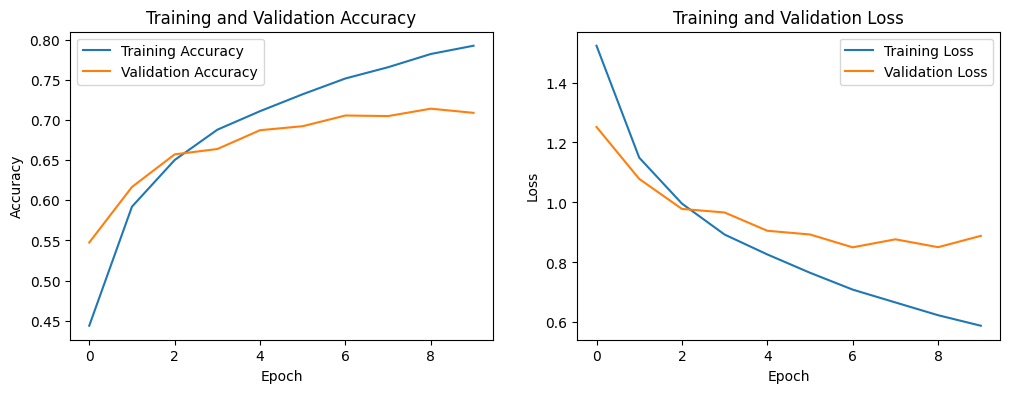

313/313 - 5s - loss: 0.8885 - accuracy: 0.7088 - 5s/epoch - 16ms/step

Test accuracy: 0.7088000178337097
313/313 [==============================] - 4s 13ms/step


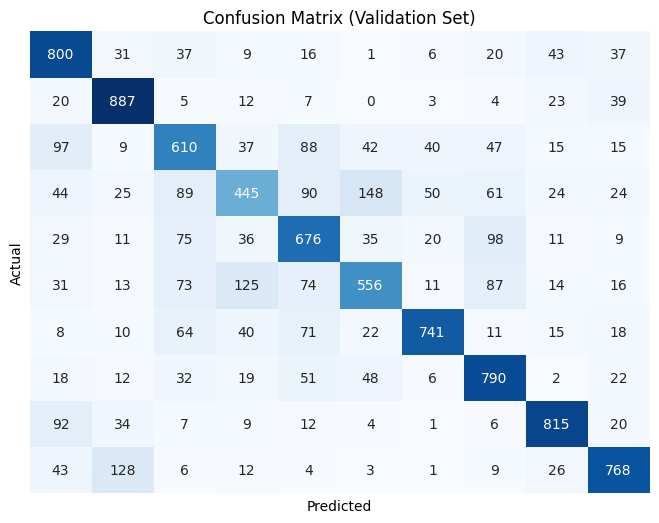

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]

# Define CNN architecture
model = keras.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10 with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Report training and validation accuracy/loss changes
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Confusion matrix for the validation set
y_pred = np.argmax(model.predict(x_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=False, yticklabels=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation Set)')
plt.show()


Epoch 1/10
1563/1563 [==============================] - 84s 53ms/step - loss: 1.6224 - accuracy: 0.3991 - val_loss: 1.3002 - val_accuracy: 0.5251
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.2562 - accuracy: 0.5479 - val_loss: 1.1964 - val_accuracy: 0.5717
Epoch 3/10
1563/1563 [==============================] - 90s 58ms/step - loss: 1.1138 - accuracy: 0.6041 - val_loss: 1.0397 - val_accuracy: 0.6231
Epoch 4/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.0201 - accuracy: 0.6396 - val_loss: 0.9844 - val_accuracy: 0.6516
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9496 - accuracy: 0.6654 - val_loss: 0.9616 - val_accuracy: 0.6593
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8972 - accuracy: 0.6838 - val_loss: 0.9394 - val_accuracy: 0.6716
Epoch 7/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8478 - accuracy: 0.7001 - val_loss: 0.9063 -

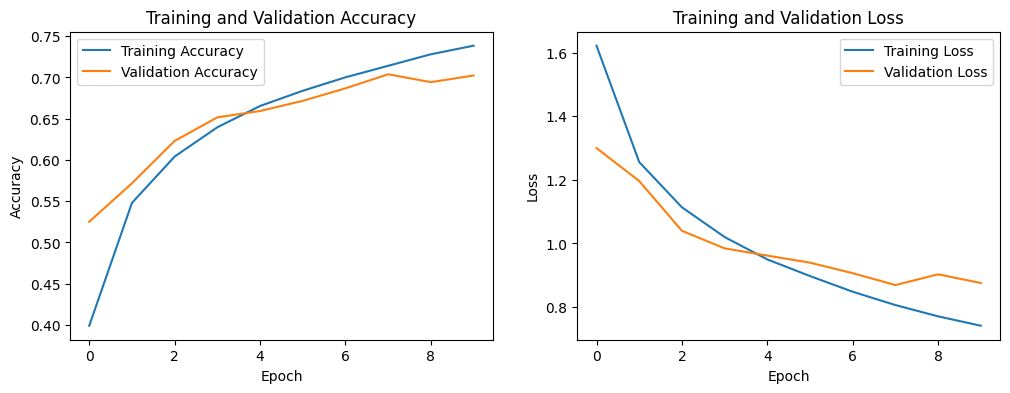

313/313 - 5s - loss: 0.8753 - accuracy: 0.7023 - 5s/epoch - 16ms/step

Test accuracy: 0.7023000121116638
313/313 [==============================] - 4s 13ms/step


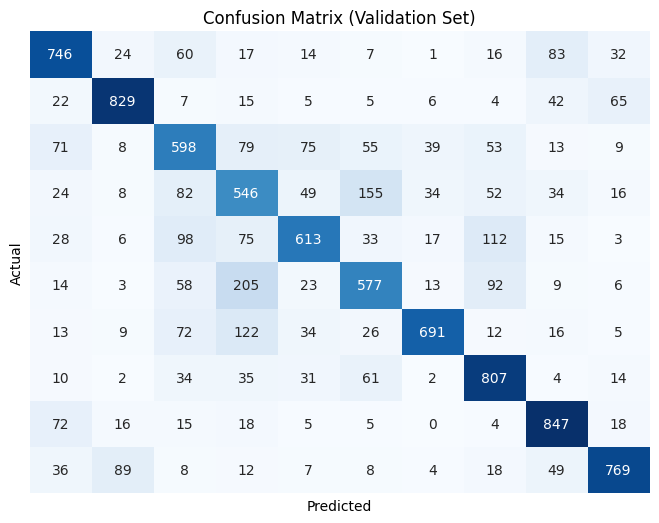

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]

# Define your CNN architecture with multiple dropout layers
model = keras.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # First dropout layer
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10 with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Report training and validation accuracy/loss changes
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Confusion matrix for the validation set
y_pred = np.argmax(model.predict(x_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=False, yticklabels=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation Set)')
plt.show()


SyntaxError: ignored